In [1]:
# import libraries and define global settings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [2]:
N = 30
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>1.5] = data[data>1.5]**2; # force a few outliers


# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data,ddof=1)


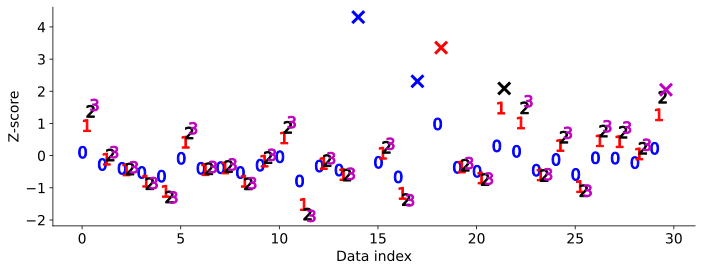

In [3]:
plt.figure(figsize=(10,4))

colorz = 'brkmc'
numiters = 0 # iteration counter
while True:

  # convert to z
  datamean = np.nanmean(dataZ)
  datastd  = np.nanstd(dataZ,ddof=1)
  dataZ = (dataZ-datamean) / datastd

  # find data values to remove
  toremove = dataZ>zscorethresh

  # break out of while loop if no points to remove
  if sum(toremove)==0:
    break
  else:
    # otherwise, mark the outliers in the plot
    plt.plot(np.where(toremove)[0]+numiters/5,dataZ[toremove],'%sx'%colorz[numiters],
             markersize=12,markeredgewidth=3)
    dataZ[toremove] = np.nan

  # replot
  plt.plot(np.arange(N)+numiters/5,dataZ,linestyle='None',marker=f'${numiters}$',markersize=12,
           color=colorz[numiters])

  # update counter
  numiters = numiters + 1

# labels
plt.ylabel('Z-score')
plt.xlabel('Data index')

# display the figure
plt.tight_layout()
plt.show()
     